<a href="https://colab.research.google.com/github/Promise-lytics/Hamoye_Internship/blob/master/Stage_D_Hamoye_DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the needed cells and as well loading the data. The MNIST is a large database of handwritten digits commonly used in training and testing image processing systems. The Image dimensions are 28*28 numpy array

In [31]:
#Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# We look at the shape of the data

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [32]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [33]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


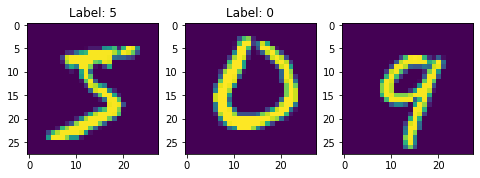

In [34]:
# Let us plot and see a few images 

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

plt.show()



Preprocessing of the data



In [35]:

# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255.
# Dividing the data by 255 scales to the required range

train_images = train_images / 255.0
test_images = test_images / 255.0

In [36]:
# Split training data to training and validation sets

x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [37]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [38]:
#Reshaping the data from 28*28 array to a single array

new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [39]:
# inputs
#placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

Creating the model architecture
This requires the building of the model architecture

In [40]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

In [41]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

In [42]:
# Initialize the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9111999869346619


Optimization for training deep neural network

In [43]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Build the model object
model = Sequential()
# Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(no_labels, activation='softmax'))

In [44]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.6752 - acc: 0.8166 - val_loss: 0.2537 - val_acc: 0.9279
Epoch 2/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2298 - acc: 0.9344 - val_loss: 0.1841 - val_acc: 0.9496
Epoch 3/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1695 - acc: 0.9512 - val_loss: 0.1479 - val_acc: 0.9595
Epoch 4/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1304 - acc: 0.9626 - val_loss: 0.1248 - val_acc: 0.9654
Epoch 5/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1064 - acc: 0.9689 - val_loss: 0.1170 - val_acc: 0.9678
Epoch 6/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.0893 - acc: 0.9738 - val_loss: 0.1044 - val_acc: 0.9718
Epoch 7/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.0745 - acc: 0.9785 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

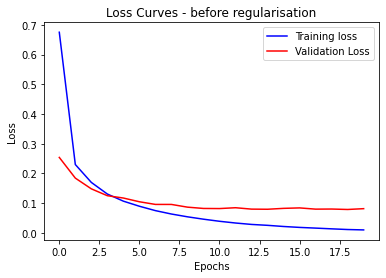

In [46]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [47]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 36us/sample - loss: 1.0126 - acc: 0.6794 - val_loss: 0.3010 - val_acc: 0.9174
Epoch 2/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.3816 - acc: 0.8873 - val_loss: 0.2033 - val_acc: 0.9421
Epoch 3/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.2865 - acc: 0.9159 - val_loss: 0.1638 - val_acc: 0.9526
Epoch 4/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2363 - acc: 0.9317 - val_loss: 0.1414 - val_acc: 0.9596
Epoch 5/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2019 - acc: 0.9403 - val_loss: 0.1245 - val_acc: 0.9631
Epoch 6/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1812 - acc: 0.9468 - val_loss: 0.1105 - val_acc: 0.9681
Epoch 7/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1599 - acc: 0.9533 - val_loss: 0.

In [48]:

test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.06767207395043806
Test accuracy: 0.9805999994277954


Text(0.5, 1.0, 'Loss Curves - after regularisation')

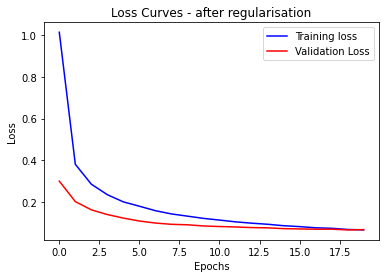

In [49]:

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

Making more predictions
The essense of this is to show forth more predictions using our model to predict some images and labels. Remember you can tweak the model to predict images and labels.

In [50]:

predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[1000]))

9


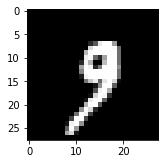

In [51]:

# Let's see whether the image would turn out to be 9
# Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

In [52]:

# You can try out others and play around with them
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[6700])) # Print out the number

4


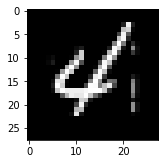

In [53]:

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[6700].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

In [57]:
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[9000]))

7


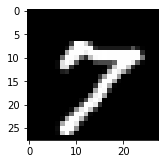

In [58]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[9000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

In [60]:
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[9500]))

2


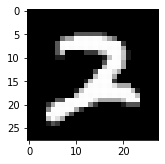

In [61]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[9500].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image